<a href="https://colab.research.google.com/github/raj-adroit/Deep-learning-CNN/blob/master/cnn_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

blog: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

We need a model to visualize.

Instead of fitting a model from scratch, we can use a pre-fit prior state-of-the-art image classification model.

Keras [provides many examples](https://keras.io/applications/) of well-performing image classification models developed by different research groups for the ImageNet Large Scale Visual Recognition Challenge, or ILSVRC. One example is the VGG-16 model that achieved top results in the 2014 competition.

This is a good model to use for visualization because it has a simple uniform structure of serially ordered convolutional and pooling layers, it is deep with 16 learned layers, and it performed very well, meaning that the filters and resulting feature maps will capture useful features. For more information on this model, see the 2015 paper “[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556).”

In [0]:
# Basic imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [0]:
# load vgg model
from keras.applications.vgg16 import VGG16

model = VGG16()

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Each convolutional layer has two sets of weights.

One is the block of filters and the other is the block of bias values. These are accessible via the layer.get_weights() function. We can retrieve these weights and then summarize their shape.

In [0]:
# summarize filter shapes

for layer in model.layers:
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [0]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [0]:
# normalize filter values to 0-1 so we can visualize them

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

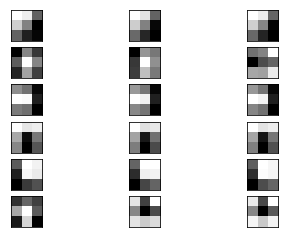

In [16]:
from matplotlib import pyplot
%matplotlib inline

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
  # get the filter
  f = filters[:,:,:,i]
  # plot each channel separately
  for j in range(3):
    # specify subplot and turn of axis
    ax = pyplot.subplot(n_filters, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    pyplot.imshow(f[:,:,j], cmap='gray')
    ix += 1

# show the figure
pyplot.show()

Although we have a visualization, we only see the first six of the 64 filters in the first convolutional layer. Visualizing all 64 filters in one image is feasible.

Sadly, this does not scale; if we wish to start looking at filters in the second convolutional layer, we can see that again we have 64 filters, but each has 64 channels to match the input feature maps. To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail.

In [17]:
# summarize feature map size for each conv layer

for i in range(len(model.layers)):
  layer = model.layers[i]
  if 'conv' not in layer.name:
    continue
  # summarize output shape
  print(i, layer.name, layer.output.shape)

1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


In [0]:
# plot feature map of the first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


In [20]:
# load the model
model = VGG16()
# redefine a model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [0]:
# load the image with required shape
img = load_img('learning/bird.jpg', target_size=(224, 224))
# conver the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (eg. scale pixel values for the vgg)
img = preprocess_input(img)
# get the feature map for the first hidden layer
feature_maps = model.predict(img)

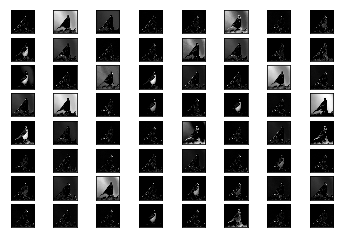

In [26]:
# plot all 64 maps in an 8x8 squres
square = 8
ix = 1
for _ in range(square):
  for _ in range(square):
    # specify subplot and turn of axis
    ax = pyplot.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1

# show the figure
pyplot.show()


Another approach would be to collect feature maps output from each block of the model in a single pass, then create an image of each.

There are five main blocks in the image (e.g. block1, block2, etc.) that end in a pooling layer. The layer indexes of the last convolutional layer in each block are [2, 5, 9, 13, 17].

In [0]:
# redfine model to output right after the first hidden layer

model = VGG16()

ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img('learning/bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represent a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for all layers

feature_maps = model.predict(img)

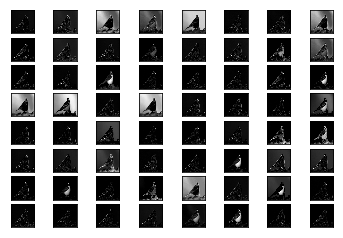

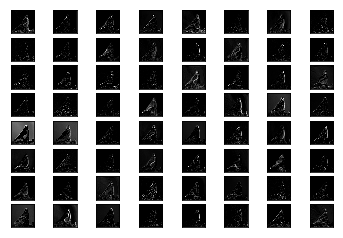

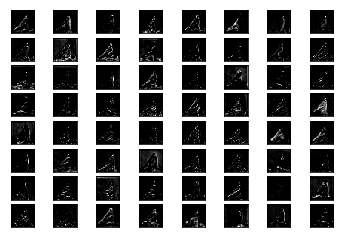

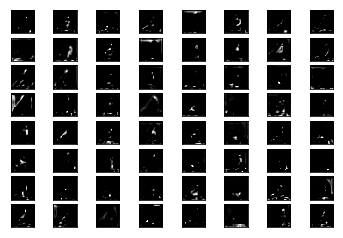

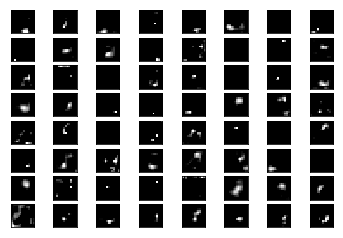

In [37]:
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

We can see that the feature maps closer to the input of the model capture a lot of fine detail in the image and that as we progress deeper into the model, the feature maps show less and less detail.

This pattern was to be expected, as the model abstracts the features from the image into more general concepts that can be used to make a classification. Although it is not clear from the final image that the model saw a bird, we generally lose the ability to interpret these deeper feature maps.
Visualization of the Feature Maps Extracted From Block 1 in the VGG16 Model